In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

**Identifying different classes of wine found in the sklearn wine dataset**

In [ ]:
data =datasets.load_wine(as_frame = True)
data.data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [ ]:
#intiate a base classifier
dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=22)

In [ ]:
#we can now predict the class of wine on the unseen test set and evaluate the model performance
y_pred = dtree.predict(X_test)

In [ ]:
print("Test Data Accurancy: ", accuracy_score(y_test, y_pred))

Test Data Accurancy:  0.8888888888888888


**Now that we have a baseline accuracy for the test dataset, we can see how the Bagging Classifier out performs a single Decision Tree Classifier.**

In [ ]:
#creating a bagging classifier
from sklearn.ensemble import BaggingClassifier

For bagging we need to set the parameter n_estimators, this is the number of base classifiers that our model is going to aggregate together.

For this sample dataset the number of estimators is relatively low, it is often the case that much larger ranges are explored. Hyperparameter tuning is usually done with a grid search, but for now we will use a select set of values for the number of estimators. **bold text**

In [ ]:
#Now lets create a range of values that represent the number of estimators we want to use in each ensemble.
estimator_range = [2, 4, 6, 8, 10, 12, 14, 16]

**To see how the Bagging Classifier performs with differing values of n_estimators we need a way to iterate over the range of values and store the results from each ensemble. To do this we will create a for loop, storing the models and scores in separate lists for later vizualizations.**

In [ ]:
models = []
scores = []

for n_estimators in estimator_range:
  #create a bagging classifier
  clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

  #fit the model
  clf.fit(X_train, y_train)

  #append the model and score to their respective lists
  models.append(clf)
  scores.append(accuracy_score(y_test, clf.predict(X_test)))

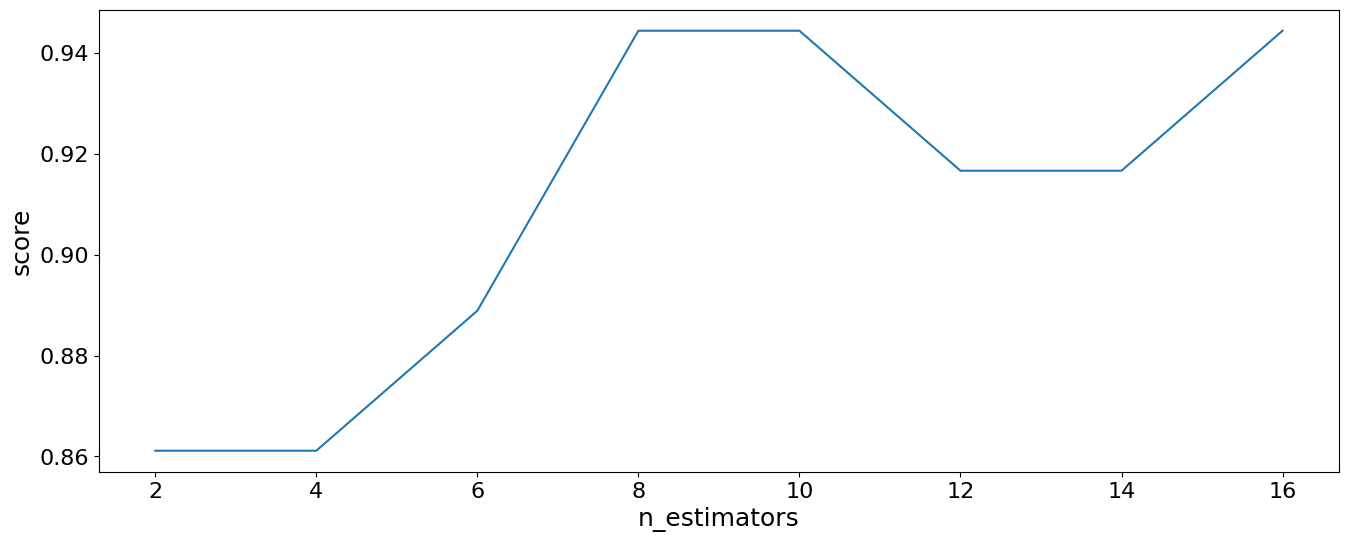

In [ ]:
#with the models and scores stored, we can observe the improvement
import matplotlib.pyplot as plt

#generate a plot of scores aganist number of estimators
plt.figure(figsize = (16, 6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

**As bootstrapping chooses random subsets of observations to create classifiers, there are observations that are left out in the selection process. These "out-of-bag" observations can then be used to evaluate the model, similarly to that of a test set. Keep in mind, that out-of-bag estimation can overestimate error in binary classification problems and should only be used as a compliment to other metrics.**

**We saw in the last exercise that 12 estimators yielded the highest accuracy, so we will use that to create our model. This time setting the parameter oob_score to true to evaluate the model with out-of-bag score.**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

In [ ]:
oob_model = BaggingClassifier(n_estimators = 12, oob_score = True, random_state = 22)

oob_model.fit(X_train, y_train)

BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)

In [ ]:
print(oob_model.oob_score_)

0.9398496240601504


[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesium <= 147.0\ngini = 0.036\nsamples = 32\nvalue = [54, 1, 0]'),
 Text(0.75, 0

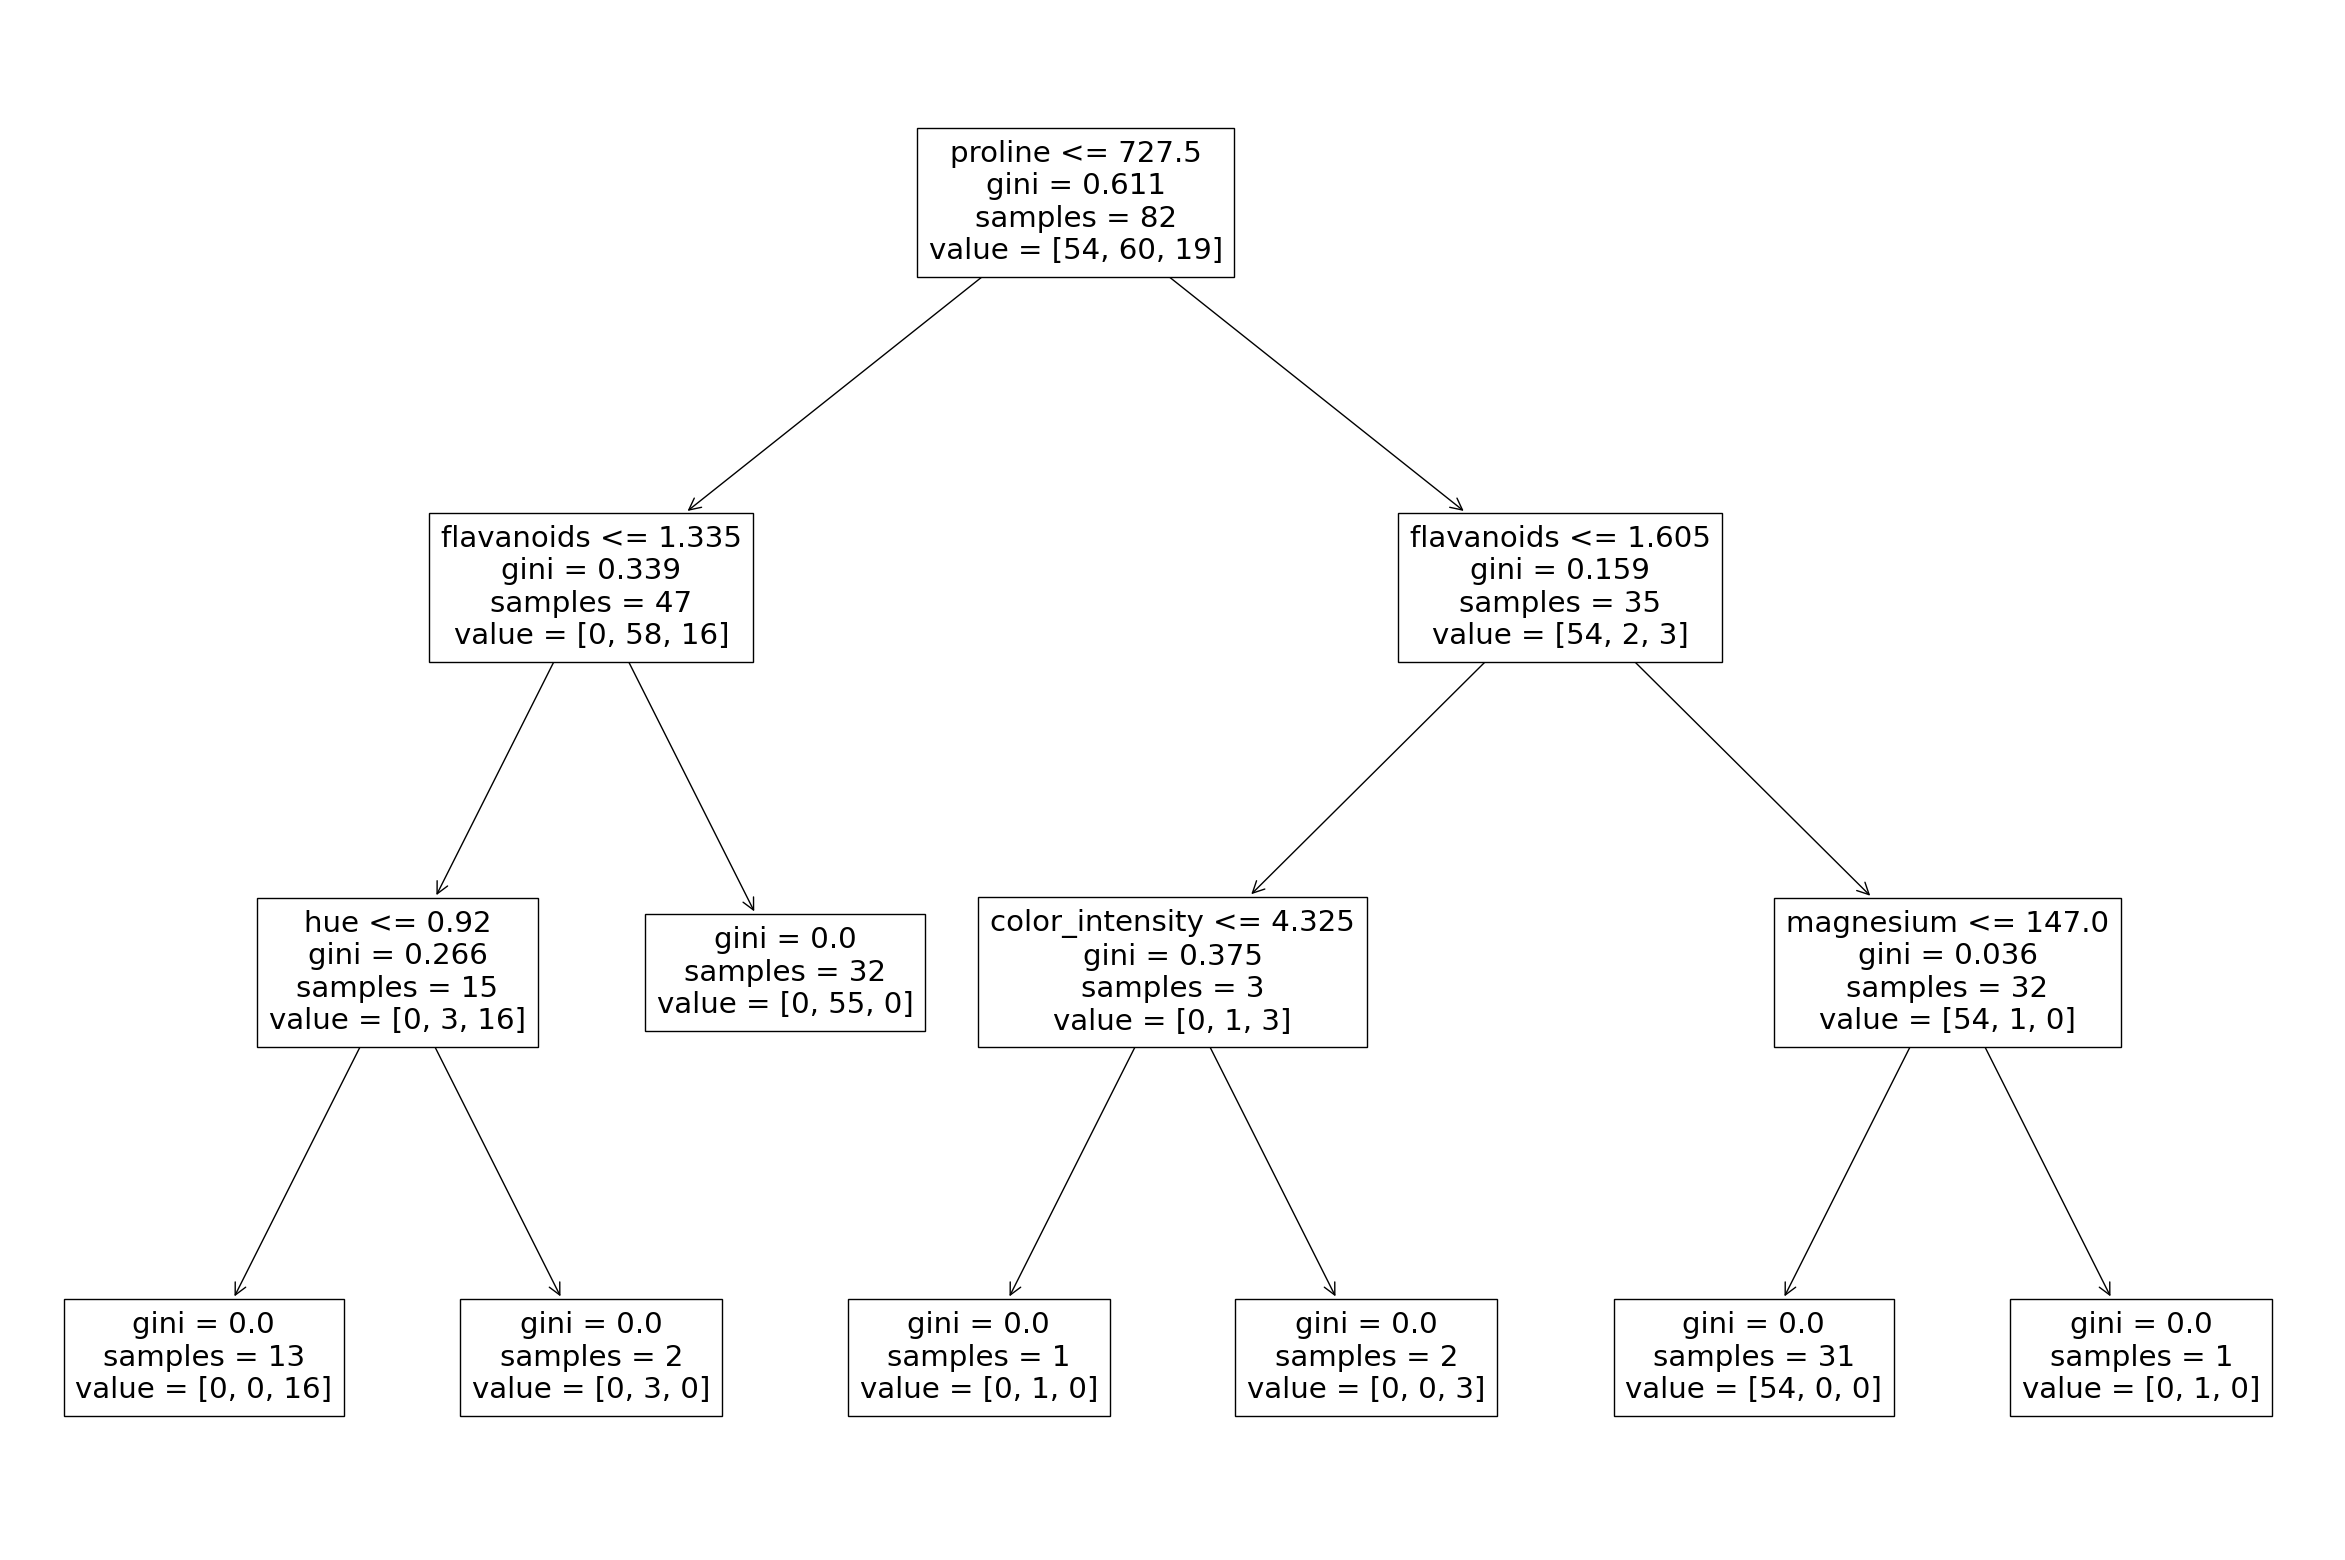

In [ ]:
#Generate Decision Trees from Bagging Classifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0], feature_names = X.columns)